In [123]:
# For Data Wrangling
import pandas as pd
import numpy as np 

# For Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# For Warnings
import warnings

In [124]:
# Reading cv
train = pd.read_csv(r"C:\Users\User\Desktop\Kaggle\Titanic\train.csv")
test = pd.read_csv(r"C:\Users\User\Desktop\Kaggle\Titanic\test.csv")

## Numerical Variables are in our datasets are "SibSp", "Parch", "Age", "Fare"

In [125]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [126]:
def plot_boxplot(df,feature):
    df.boxplot(column = [feature])
    plt.title(feature)
    plt.grid(False)
    plt.show()

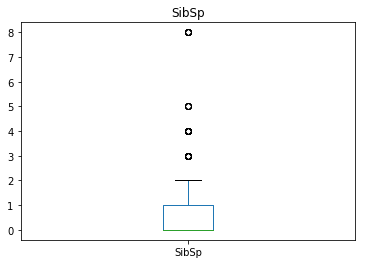

In [127]:
plot_boxplot(train,"SibSp")

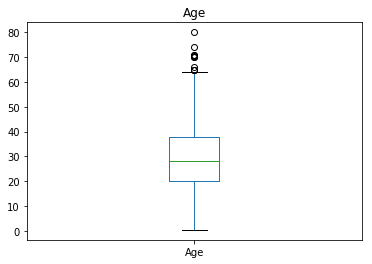

In [128]:
plot_boxplot(train,"Age")

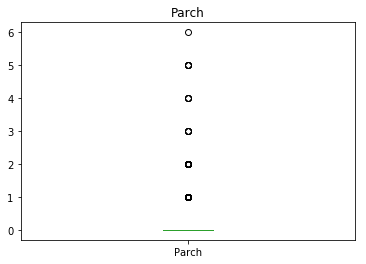

In [129]:
plot_boxplot(train,"Parch")

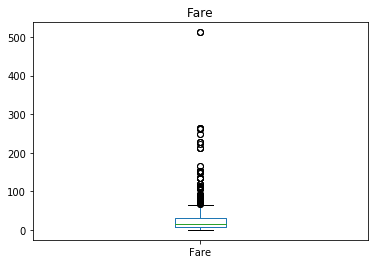

In [130]:
plot_boxplot(train,"Fare")

# Remove outliers
## Using Tukey Method
* define a function called "outliers" which returns a list of index of outliers
## Calculation part of Tukey method
* IQR = Q3 - Q1
* +/- 1.5 * IQR

In [131]:
# This function return index of outliers
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3- Q1
    
    lower_bound = Q1 - (1.5 * IQR) 
    upper_bound = Q3 + (1.5 * IQR)
    
    # Store index of outliers
    ls = df.index[( df[ft] < lower_bound ) | ( df[ft] > upper_bound ) ]
    bound_tuple = (lower_bound,upper_bound)
    
    return ls
    

In [132]:
print(outliers(train,"Age"))


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')


In [133]:
# create an empty list to store the output indeces from multiple columns
index_list = []
feature_list = ["Age","Parch","SibSp","Fare"]

# Using for loops means that
# Find outliers in "Age","Parch","SibSp","Fare" columns each, then combine it (using extend functon) in one list
for feature in feature_list:
    index_list.extend(outliers(train,feature))
    

In [134]:
len_of_index_list = len(index_list)
print("Length of Outliers index list ", len_of_index_list)
index_list


Length of Outliers index list  386


[33,
 54,
 96,
 116,
 280,
 456,
 493,
 630,
 672,
 745,
 851,
 7,
 8,
 10,
 13,
 16,
 24,
 25,
 27,
 43,
 50,
 54,
 58,
 59,
 63,
 65,
 68,
 71,
 78,
 86,
 88,
 93,
 97,
 98,
 102,
 118,
 119,
 124,
 128,
 136,
 140,
 145,
 147,
 148,
 153,
 155,
 159,
 160,
 164,
 165,
 166,
 167,
 171,
 172,
 175,
 176,
 180,
 182,
 183,
 184,
 188,
 193,
 197,
 201,
 205,
 229,
 233,
 237,
 247,
 248,
 251,
 254,
 255,
 259,
 261,
 262,
 266,
 268,
 272,
 273,
 278,
 279,
 297,
 299,
 305,
 311,
 312,
 314,
 318,
 319,
 323,
 324,
 328,
 329,
 332,
 340,
 341,
 348,
 352,
 356,
 360,
 362,
 374,
 377,
 381,
 386,
 390,
 394,
 407,
 409,
 416,
 417,
 419,
 423,
 424,
 435,
 436,
 437,
 438,
 440,
 445,
 446,
 448,
 450,
 469,
 472,
 479,
 480,
 485,
 489,
 498,
 506,
 523,
 529,
 530,
 532,
 533,
 535,
 539,
 540,
 541,
 542,
 548,
 549,
 550,
 558,
 567,
 580,
 581,
 585,
 587,
 593,
 595,
 600,
 608,
 610,
 615,
 616,
 618,
 622,
 634,
 637,
 638,
 642,
 644,
 651,
 657,
 659,
 670,
 678,
 679,
 6

### Now i will define a function which called "remove" which returns a cleaned dataframe without outliers

In [135]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
    

In [136]:
index_list = sorted(set(index_list))
train.drop(index_list,inplace=True)
print(train.shape)
train

(598, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
